In [1]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

In [2]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2015,12,31)
#set waktu awal dan akhir untuk tanggal saham

In [3]:
df1 = pdr.DataReader('WIKA.JK', 'yahoo', start, end)
df2 = pdr.DataReader('PTPP.JK', 'yahoo', start, end)
df3 = pdr.DataReader('ADHI.JK', 'yahoo', start, end)
df4= pdr.DataReader('WSKT.JK', 'yahoo', start, end)
#import data dari yahoo sesuai dengan kode sahamnya

In [4]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-22,2426.310059,2393.899902,2407.790039,2417.050049,6146165.0,2281.453369
2015-12-23,2444.830078,2407.790039,2444.830078,2407.790039,7100301.0,2272.712891
2015-12-28,2444.830078,2393.899902,2407.790039,2430.939941,9584661.0,2294.563721
2015-12-29,2458.719971,2417.050049,2417.050049,2426.310059,5078323.0,2290.193604
2015-12-30,2472.620117,2430.939941,2440.199951,2444.830078,10173815.0,2307.674805


In [6]:
adj_close1 = df1['Adj Close']
adj_close2 = df2['Adj Close']
adj_close3 = df3['Adj Close']
adj_close4 = df4['Adj Close']
#membuat variabel untuk bagian 'close' saja

In [7]:
time1 = np.linspace(1, len(adj_close1), len(adj_close1))
time2 = np.linspace(1, len(adj_close2), len(adj_close2))
time3 = np.linspace(1, len(adj_close3), len(adj_close3))
time4 = np.linspace(1, len(adj_close4), len(adj_close4))
#membuat variabel waktu

Populating the interactive namespace from numpy and matplotlib


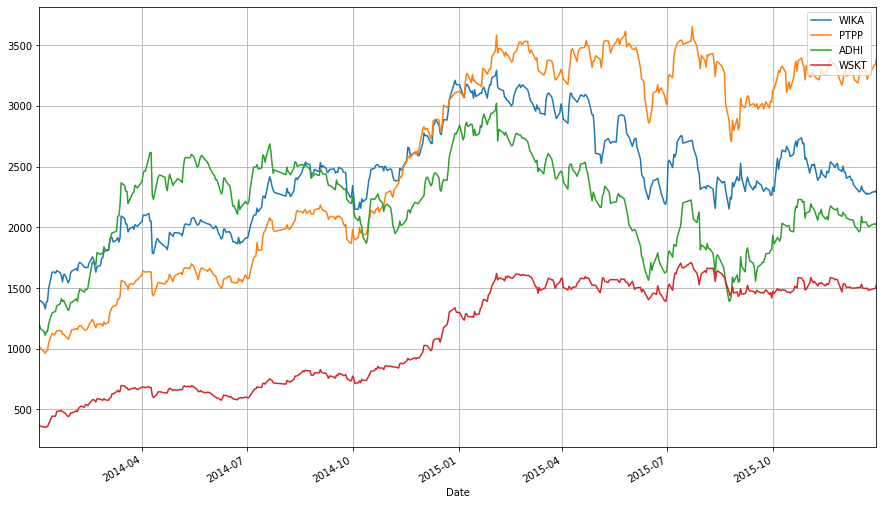

In [8]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   
 
df1['Adj Close'].plot(grid = True,label='WIKA') 
df2['Adj Close'].plot(grid = True, label='PTPP')
df3['Adj Close'].plot(grid = True, label='ADHI')
df4['Adj Close'].plot(grid = True, label='WSKT')
pylab.legend(loc = 'upper right')
#menampilkan grafik data saham

In [9]:
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

returns1 = daily_return(adj_close1)
returns2 = daily_return(adj_close2)
returns3 = daily_return(adj_close3)
returns4 = daily_return(adj_close4)

mu1 = np.mean(returns1)*252           
sig1 = np.std(returns1)*np.sqrt(252.) 

mu2 = np.mean(returns2)*252           
sig2 = np.std(returns2)*np.sqrt(252.) 

mu3 = np.mean(returns3)*252           
sig3 = np.std(returns3)*np.sqrt(252.) 

mu4 = np.mean(returns4)*252           
sig4 = np.std(returns4)*np.sqrt(252.) 

#perhitungan GBM-nya

In [10]:
print(mu1, sig1)
print(mu2, sig2)
print(mu3, sig3)
print(mu4, sig4)

0.3317144345995669 0.3802678242648928
0.6811786841310858 0.34659528346351803
0.3826347304621688 0.464669208876625
0.8074214178149355 0.37388468247470863


In [11]:
#GBM Exact Solution
#parameter
#so     : initial stock price
#mu     : koef. drift
#sig    : koef. diff.
#W      : brown motion
#T      : Time Period
#N      : number of increment

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


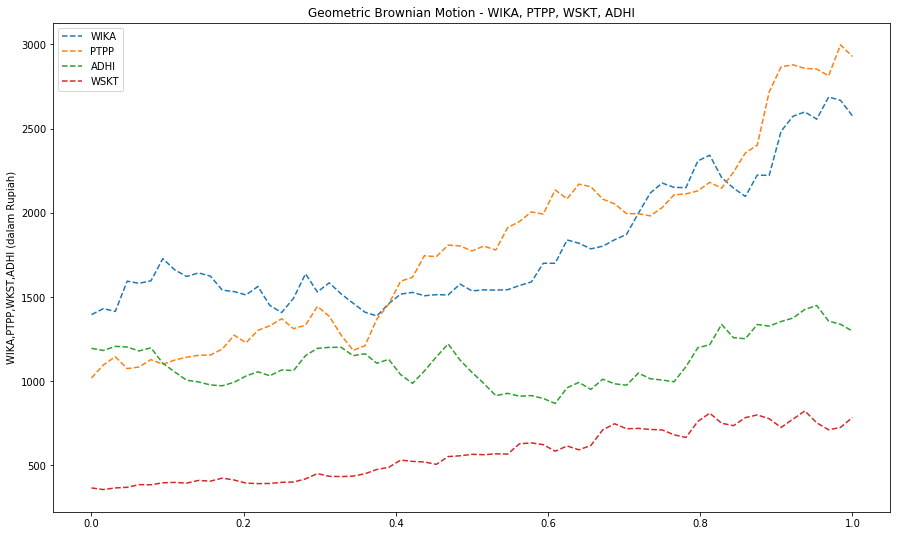

In [125]:
#menampilkan grafik prediksinya

def GBM(so, mu, sig, W, T, N):
    t = np.linspace(0., 1., N+1)
    s = []
    s.append(so)
    for i in range(1, int(N+1)):
        drift = (mu - 0.5*sig**2)*t[i]
        diffusion = sig1*W[i-1]
        s_temp = so*np.exp(drift+diffusion)
        s.append(s_temp)
    return s, t
T= 1.
N = 2.**6

seed = 5
W = brownian(seed, N)[0]
so1 = adj_close1[0] #intial value stock price
sol1 = GBM(so1, mu1, sig1, W, T, N)[0]  #exact solution
t1 = GBM(so1, mu1, sig1, W, T, N)[1]    #time increments for plotting

seed = 10
W = brownian(seed, N)[0]
so2 = adj_close2[0] #intial value stock price
sol2 = GBM(so2, mu2, sig2, W, T, N)[0]  #exact solution
t2 = GBM(so2, mu2, sig2, W, T, N)[1]    #time increments for plotting

seed = 15
W = brownian(seed, N)[0]
so3 = adj_close3[0] #intial value stock price
sol3 = GBM(so3, mu3, sig3, W, T, N)[0]  #exact solution
t3 = GBM(so3, mu3, sig3, W, T, N)[1]    #time increments for plotting

seed = 1000
W = brownian(seed, N)[0]
so4 = adj_close4[0] #intial value stock price
sol4 = GBM(so4, mu4, sig4, W, T, N)[0]  #exact solution
t4 = GBM(so4, mu4, sig4, W, T, N)[1]    #time increments for plotting

#menampilkan grafiknya
plt.plot( t1,sol1, label = 'WIKA', ls = '--')
plt.plot( t2,sol2, label = 'PTPP', ls = '--')
plt.plot( t3,sol3, label = 'ADHI', ls = '--')
plt.plot( t4,sol4, label = 'WSKT', ls = '--')

plt.ylabel('WIKA,PTPP,WKST,ADHI (dalam Rupiah)')
plt.title('Geometric Brownian Motion - WIKA, PTPP, WSKT, ADHI')
plt.legend(loc = 'upper left')


In [186]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2014,12,31)

In [187]:
dfA = pdr.DataReader('WIKA.JK', 'yahoo', start, end)
dfB = pdr.DataReader('PTPP.JK', 'yahoo', start, end)
dfC = pdr.DataReader('ADHI.JK', 'yahoo', start, end)
dfD= pdr.DataReader('WSKT.JK', 'yahoo', start, end)

In [189]:
adj_closeA = dfA['Adj Close']
adj_closeB = dfB['Adj Close']
adj_closeC = dfC['Adj Close']
adj_closeD = dfD['Adj Close']

In [190]:
timeA = np.linspace(1, len(adj_closeA), len(adj_closeA))
timeB = np.linspace(1, len(adj_closeB), len(adj_closeB))
timeC = np.linspace(1, len(adj_closeC), len(adj_closeC))
timeD = np.linspace(1, len(adj_closeD), len(adj_closeD))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


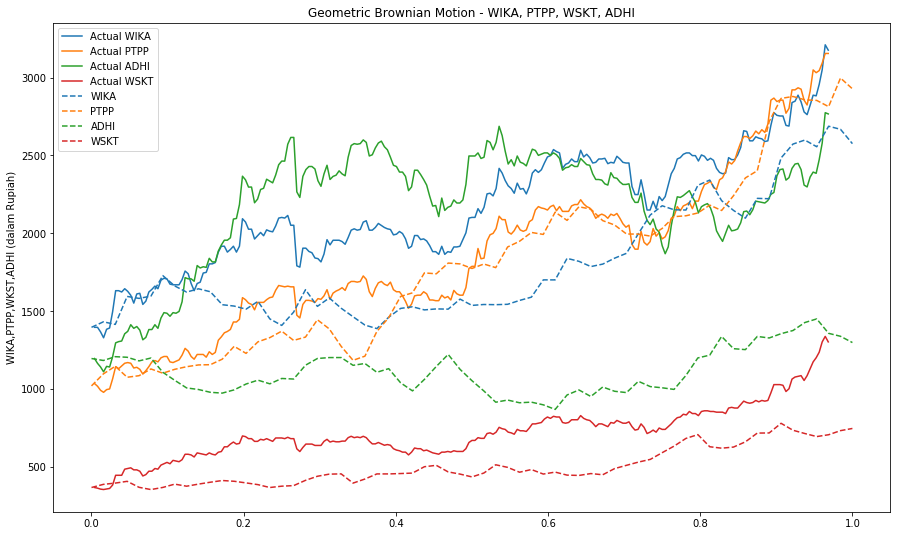

In [208]:
T= 1.
N = 2.**6

seed = 5
W = brownian(seed, N)[0]
so1 = adj_close1[0] #intial value stock price
sol1 = GBM(so1, mu1, sig1, W, T, N)[0]  #exact solution
t1 = GBM(so1, mu1, sig1, W, T, N)[1]    #time increments for plotting

seed = 10
W = brownian(seed, N)[0]
so2 = adj_close2[0] #intial value stock price
sol2 = GBM(so2, mu2, sig2, W, T, N)[0]  #exact solution
t2 = GBM(so2, mu2, sig2, W, T, N)[1]    #time increments for plotting

seed = 15
W = brownian(seed, N)[0]
so3 = adj_close3[0] #intial value stock price
sol3 = GBM(so3, mu3, sig3, W, T, N)[0]  #exact solution
t3 = GBM(so3, mu3, sig3, W, T, N)[1]    #time increments for plotting

seed = 20
W = brownian(seed, N)[0]
so4 = adj_close4[0] #intial value stock price
sol4 = GBM(so4, mu4, sig4, W, T, N)[0]  #exact solution
t4 = GBM(so4, mu4, sig4, W, T, N)[1]    #time increments for plotting

time = np.linspace(1, len(adj_closeA), len(adj_closeA))
time = [i/252. for i in time]
time = np.linspace(1, len(adj_closeB), len(adj_closeB))
time = [i/252. for i in time]
time = np.linspace(1, len(adj_closeC), len(adj_closeC))
time = [i/252. for i in time]
time = np.linspace(1, len(adj_closeC), len(adj_closeC))
time = [i/252. for i in time]

#menampilkan grafik prediksi dengan harga sebenarnya
plt.plot(time, adj_closeA,'C0',label = 'Actual WIKA')
plt.plot(time, adj_closeB,'C1',label = 'Actual PTPP')
plt.plot(time, adj_closeC,'C2',label = 'Actual ADHI')
plt.plot(time, adj_closeD,'C3',label = 'Actual WSKT')
plt.plot( t1,sol1,'C0', label = 'WIKA', ls = '--')
plt.plot( t2,sol2,'C1', label = 'PTPP', ls = '--')
plt.plot( t3,sol3,'C2', label = 'ADHI', ls = '--')
plt.plot( t4,sol4,'C3', label = 'WSKT', ls = '--')

plt.ylabel('WIKA,PTPP,WKST,ADHI (dalam Rupiah)')
plt.title('Geometric Brownian Motion - WIKA, PTPP, WSKT, ADHI')
plt.legend(loc = 'upper left')
